# FashionMNIST AutoEncoder

In [1]:
import torch
import torchvision
import torch.nn.functional as F
from torch import nn, optim
from torchvision import transforms, datasets

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

In [4]:
#하이퍼파라미터
EPOCH = 50
BATCH_SIZE = 64
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device('cuda' if USE_CUDA else "cpu")

trainset = datasets.FashionMNIST(
    root = '/content/sample_data/',
    train = True,
    download = True,
    transform = transforms.ToTensor()
)

train_loader = torch.utils.data.DataLoader(
    dataset = trainset,
    batch_size = BATCH_SIZE,
    shuffle = True,
    num_workers = 2

)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /content/sample_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/sample_data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /content/sample_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/sample_data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /content/sample_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/sample_data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /content/sample_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/sample_data/FashionMNIST/raw



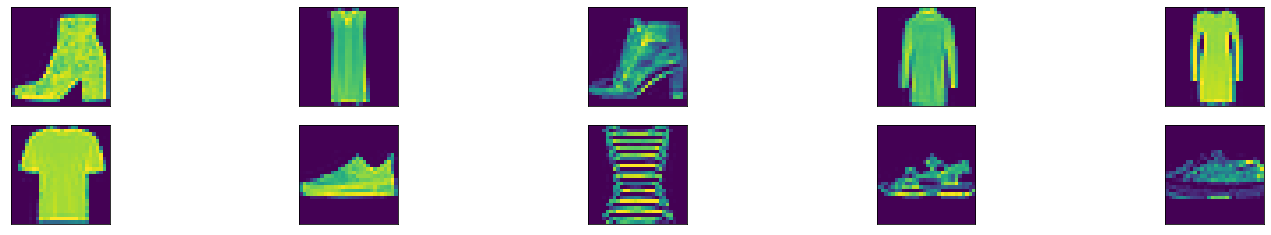

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", message="Clipping input data to the valid range for imshow with RGB data")

def imshow(img):
    img = img * 0.5 + 0.5 
    plt.imshow(np.transpose(img, (1, 2, 0)))  

dataiter = iter(train_loader) 
images, labels = next(dataiter)
images = images.numpy() 

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(10): 
    ax = fig.add_subplot(2, 5, idx+1, xticks=[], yticks=[])
    imshow(images[idx])


In [20]:
class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()

    self.encoder = nn.Sequential(
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 12),
        nn.ReLU(),
        nn.Linear(12, 3)
    )

    self.decoder = nn.Sequential(
        nn.Linear(3, 12),
        nn.ReLU(),
        nn.Linear(12, 64),
        nn.ReLU(),
        nn.Linear(64, 128),
        nn.ReLU(),
        nn.Linear(128, 28*28),
        nn.Sigmoid(),

    )

  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded, decoded

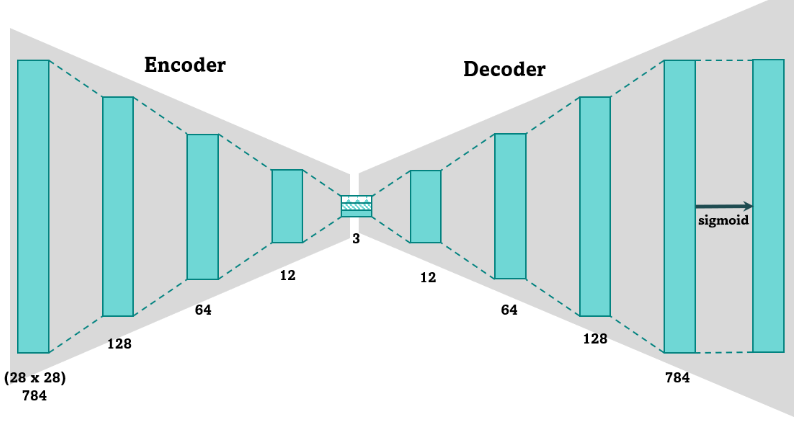

In [21]:
autoencoder = Autoencoder().to(DEVICE)
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.005)
criterion = nn.MSELoss()

view_data = trainset.data[:5].view(-1, 28*28)
view_data = view_data.type(torch.FloatTensor)/255.

In [22]:
print(autoencoder)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=12, bias=True)
    (5): ReLU()
    (6): Linear(in_features=12, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=12, bias=True)
    (1): ReLU()
    (2): Linear(in_features=12, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=784, bias=True)
    (7): Sigmoid()
  )
)


[Epoch 1]


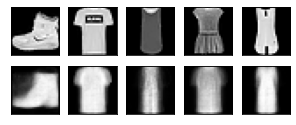

[Epoch 2]


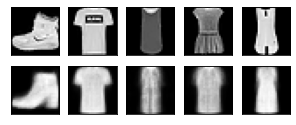

[Epoch 3]


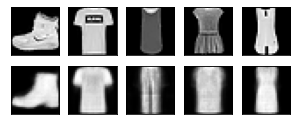

[Epoch 4]


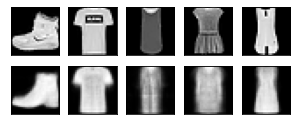

[Epoch 5]


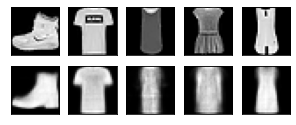

[Epoch 6]


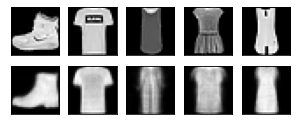

[Epoch 7]


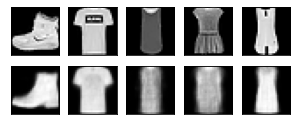

[Epoch 8]


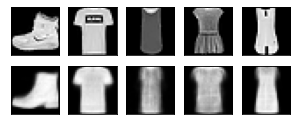

[Epoch 9]


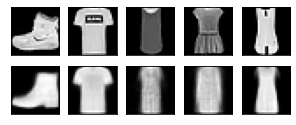

[Epoch 10]


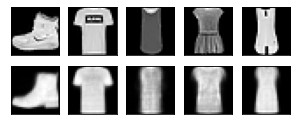

[Epoch 11]


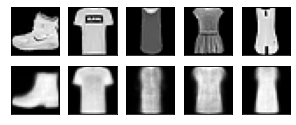

[Epoch 12]


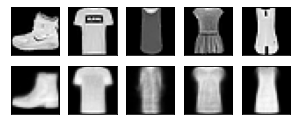

[Epoch 13]


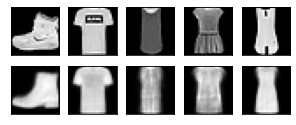

[Epoch 14]


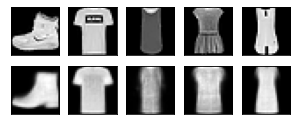

[Epoch 15]


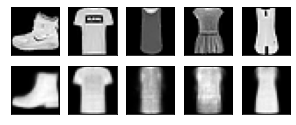

[Epoch 16]


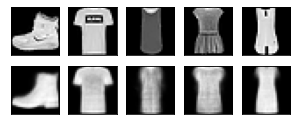

[Epoch 17]


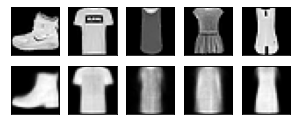

[Epoch 18]


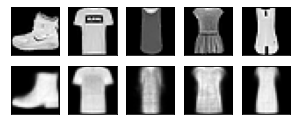

[Epoch 19]


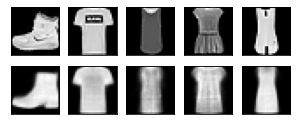

[Epoch 20]


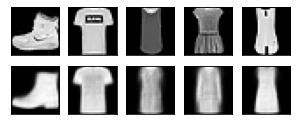

[Epoch 21]


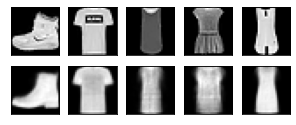

[Epoch 22]


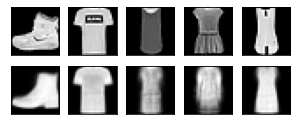

[Epoch 23]


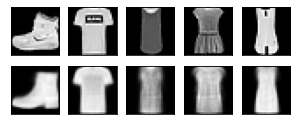

[Epoch 24]


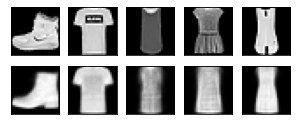

[Epoch 25]


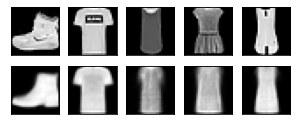

[Epoch 26]


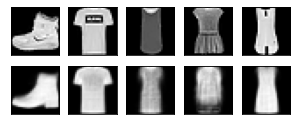

[Epoch 27]


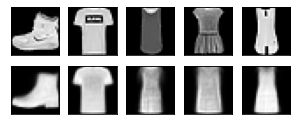

[Epoch 28]


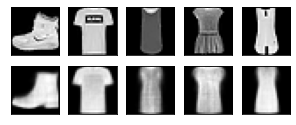

[Epoch 29]


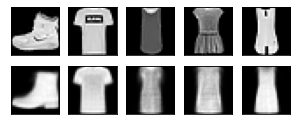

[Epoch 30]


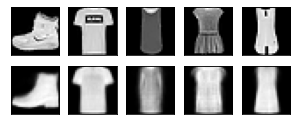

[Epoch 31]


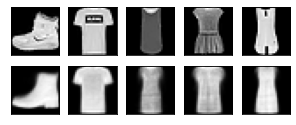

[Epoch 32]


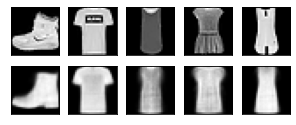

[Epoch 33]


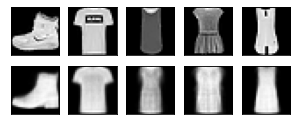

[Epoch 34]


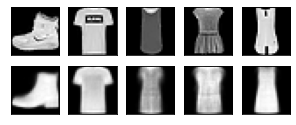

[Epoch 35]


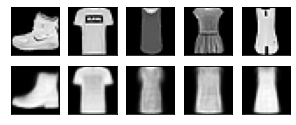

[Epoch 36]


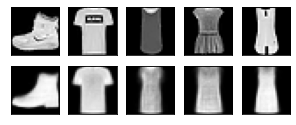

[Epoch 37]


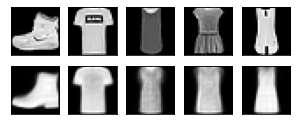

[Epoch 38]


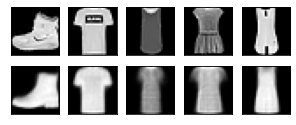

[Epoch 39]


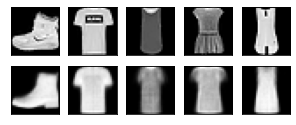

[Epoch 40]


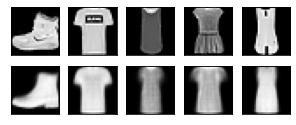

[Epoch 41]


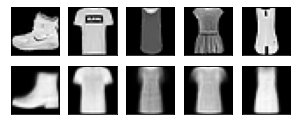

[Epoch 42]


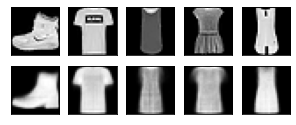

[Epoch 43]


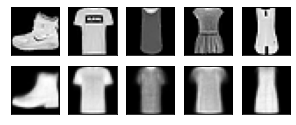

[Epoch 44]


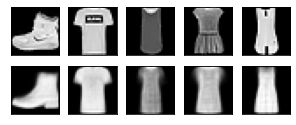

[Epoch 45]


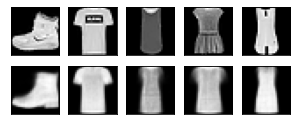

[Epoch 46]


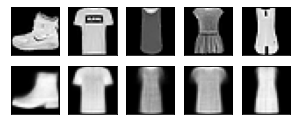

[Epoch 47]


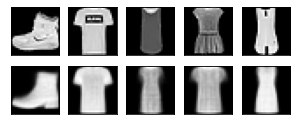

[Epoch 48]


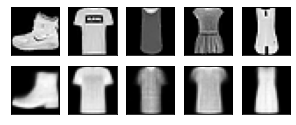

[Epoch 49]


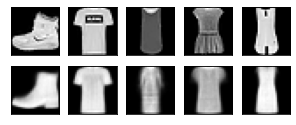

[Epoch 50]


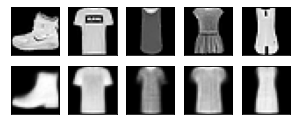

In [23]:
def train(autoencoder, train_loader):
  autoencoder.train()
  for step, (x,label) in enumerate(train_loader):
    x = x.view(-1, 28*28).to(DEVICE)
    y = x.view(-1, 28*28).to(DEVICE)

    label = label.to(DEVICE)

    encoded, decoded = autoencoder(x)

    loss = criterion(decoded, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


for epoch in range(1, EPOCH+1):
  train(autoencoder, train_loader)

  test_x = view_data.to(DEVICE)
  _, decoded_data = autoencoder(test_x)

  f, a = plt.subplots(2, 5, figsize=(5,2))
  print("[Epoch {}]".format(epoch))
  for i in range(5):
    img = np.reshape(view_data.data.numpy()[i], (28,28))
    a[0][i].imshow(img, cmap = 'gray')
    a[0][i].set_xticks(()); a[0][i].set_yticks(())

  for i in range(5):
    img = np.reshape(decoded_data.to('cpu').data.numpy()[i], (28,28))
    a[1][i].imshow(img, cmap = 'gray')
    a[1][i].set_xticks(()); a[1][i].set_yticks(())

  plt.show()


In [24]:
# 잠재변수를 3D 플롯으로 시각화
view_data = trainset.data[:200].view(-1, 28*28)
view_data = view_data.type(torch.FloatTensor)/255.
test_x = view_data.to(DEVICE)
encoded_data, _ = autoencoder(test_x)
encoded_data = encoded_data.to("cpu")

<ipython-input-25-6ee04cdfa8b6>:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


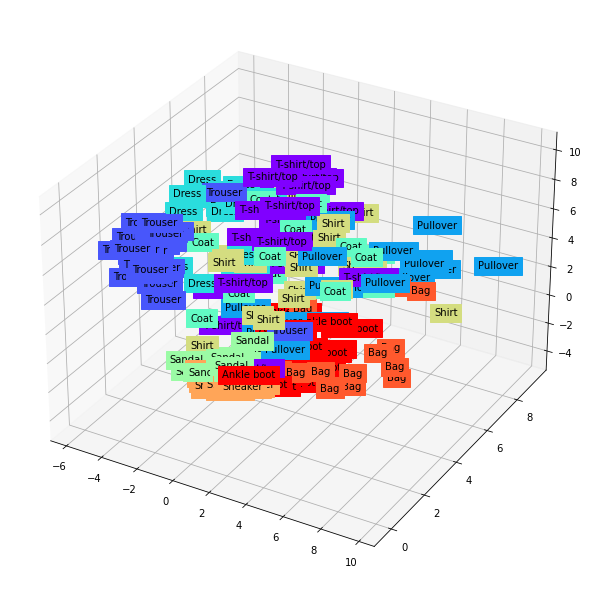

In [25]:
CLASSES = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)

X = encoded_data.data[:, 0].numpy()
Y = encoded_data.data[:, 1].numpy()
Z = encoded_data.data[:, 2].numpy()

labels = trainset.targets[:200].numpy()

for x, y, z, s in zip(X, Y, Z, labels):
    name = CLASSES[s]
    color = cm.rainbow(int(255*s/9))
    ax.text(x, y, z, name, backgroundcolor=color)

ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_zlim(Z.min(), Z.max())
plt.show()

오토인코더의 잠재변수들: 비슷한 레이블을 같는 이미지의 잠재변수(latent variable)은 서로 가까이 모여 있는 것을 알 수 있음   

잠재 공간(latent space)에서 공간적으로 비슷하게 매핑 -> 오토인코더가 데이터의 정보를 유지하면서 차원을 축소하고 이에 따라 중요한 정보를 추출할 수 있음을 의미